<img src="../source/images/kandinsky.png" alt="" width="400"/>

# STA 220 Data & Web Technologies for Data Analysis

## Homework 1


Due __January 22 (Sunday), 2023__ by 11:59pm. Submit by editing this file, rename it to __"LastName_FirstName_hw1"__ and then uploading to Canvas twice, in __ipynb and html__ format! 

---
Instructions: 
1. Put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text. Answer all questions with complete sentences.

2. Your code should be readable; writing a piece of code should be compared to writing a page of a book. Adopt the *one-statement-per-line* rule. The lenghth of your code may not exceed the maximum length of each cell for display. If your code is too long, split it into multiple lines to improve readability. 

3. To help understand and maintain code, you should always add comments to explain your code. Use the hash symbol (#) to start writing a comment. Uncommented solutions will not be graded. If you are writing a function, consider using a _docstring_ to add explanation. 

4. Do not clear your output so that we can see your answers without running all of the cells.

### Problem 1: Cross-Validation [3 Points]

Consider the `mastitis.csv` data set, which reports counts of mastitis, an infectious disease, amongst herds of dairy cows. We are not interested in modeling yet, but we want to implement a leave-one-out cross-validation (LOOCV) scheme using a suitable parallelization mechanism. To this end, consider the two estimators *sample mean* and *sample median* and determine which one exhibits a lower mean squared error (MSE). The MSE is estimated via LOOCV. 

For a independent and identically distributed sample $y_1, \dots, y_n$, the LOOCV estimator $CV_{(n)}$ for the MSE of a estimator $\hat y_i$ for $E(y_i)$ is computed as follows: 

1. for i in 1 to $n$
2. ... compute the estimate $\hat y_i$ based on all but the i-th observation
3. ... return $MSE_i = (y_i - \hat y_i)^2$ 
4. compute $CV_{(n)} = n^{-1} \sum_{i=1}^n MSE_i$

$CV_{(n)}$ is an asymptotically optimal estimator for the MSE. 

#### Exercise

Read in the data and transform it to a `pandas.Series`. Implement LOOCV for the sample mean and sample median. Use a suitable parallelization technique to speed up the computation of $CV_{(n)}$. Run this procedure. Report this value for both the sample mean and sample median. Which estimator is to be preferred? 

In [4]:
#import libraries and read in data
import pandas as pd
import numpy as np

mastitis_df = pd.read_csv(filepath_or_buffer= "mastitis.csv").squeeze()

def loocv_mean(numbers):
    MSE_list= []
    for i in range(len(numbers)):
        #drop the ith value and compute MSE_i as np.sum((vec_of_y - mean_i )**2)
        ith_val = numbers.pop(i)
        
        #calculate the MSE and append it to MSE_list
        MSE_i = np.sum( (numbers - np.mean(numbers) )**2  )/len(numbers)
        MSE_list.append(MSE_i)
        # print(numbers, MSE_i)
        
        #re-insert the removed value back into the numbers list at its original index
        numbers.insert(i,ith_val)
        
    return(np.sum(MSE_list)/len(MSE_list)) #return CV_n (mean)


def loocv_median(numbers):
    MSE_list= []
    for i in range(len(numbers)):
        #drop the ith value and compute MSE_i as np.sum((vec_of_y - mean_i )**2)
        ith_val = numbers.pop(i)
        
        #calculate the MSE and append it to MSE_list
        MSE_i = np.sum( (numbers - np.median(numbers) )**2  )/len(numbers)
        MSE_list.append(MSE_i)
        # print(numbers, MSE_i)
        
        #re-insert the removed value back into the numbers list at its original index
        numbers.insert(i,ith_val)
        
    return(np.sum(MSE_list)/len(MSE_list)) #return CV_n (median)





In [9]:
#implement the calculation of CV_n for both the mean and median— which is the better estimator?
import multiprocessing
import requests, time
from multiprocessing import Pool
import time
import math

session = None
multiprocessing.set_start_method("fork", True) # new process will be a copy from previous process

def set_global_session():
    global session
    if not session:
        session = requests.Session()

# def download_site(url):
#     session.get(url)
#     # ... do something ... 

# def parallelize_loocv_mean(data):
#     with multiprocessing.Pool(initializer=set_global_session, processes=1) as pool: # change processes!
#         pool.map(loocv_mean, data)

# def parallelize_loocv_median(data):
#     with multiprocessing.Pool(initializer=set_global_session, processes=1) as pool: # change processes!
#         pool.map(loocv_median, data)



N = 5000000

def cube(x):
    return math.sqrt(x)

if __name__ == "__main__":
    # first way, using multiprocessing
    start_time = time.perf_counter()
    with Pool() as pool:
      result = pool.map(loocv_mean, mastitis_df.to_list())
    finish_time = time.perf_counter()
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))
    print("---")
    

TypeError: object of type 'int' has no len()

In [8]:
mastitis_df.tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 15,
 16,
 16,
 16,
 16,
 17,
 17,
 17,
 18,
 18,
 18,
 19,
 19,
 19,
 19,
 20,
 20,
 21,
 21,
 22,
 22,
 22,
 22,
 23,
 25,
 25,
 25,
 25,
 25,
 25]

In [215]:
from multiprocessing import Pool
import time
import math

N = 5000000

def cube(x):
    return math.sqrt(x)

if __name__ == "__main__":
    # first way, using multiprocessing
    start_time = time.perf_counter()
    with Pool() as pool:
      result = pool.map(cube, range(10,N))
    finish_time = time.perf_counter()
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))
    print("---")

Program finished in 0.3918112920000567 seconds - using multiprocessing
---


In [ ]:
start_time = time.perf_counter()
result = []
for x in range(10,N):
    result.append(cube(x))
    finish_time = time.perf_counter()
    print("Program finished in {} seconds".format(finish_time-start_time))

### Problem 2: Lahman's Baseball Database [7 Points]

In this assignment, you'll use `sqlite3` to explore data in [Lahman's Baseball Database](http://www.seanlahman.com/baseball-archive/statistics/), which contains "complete batting and pitching statistics from 1871 to 2020, plus fielding statistics, standings, team stats, managerial records, post-season data, and more." We use the 2019 version for this homework. You can find the database in SQLite format on Canvas. Documentation for the database, including a description of all tables, is in the `readme2019.txt` file included on Canvas.

The purpose of this assignment is to practice accessing and analyzing data in a database. For full credit, query the correct table with `pandas.read_sql` and a single SQL query. Do not subset, group, sort, aggregate, ect. via `pandas`, but use SQL commands to return the desired table.

#### Exercises

In [12]:
import sqlalchemy
import pandas as pd
import matplotlib.pyplot as plt

engine = sqlalchemy.create_engine("sqlite://///Users/collinkennedy/Dropbox/R_dropbox/STA220/STA220/lahmansbaseballdb.sqlite")
inspector = sqlalchemy.inspect(engine)
inspector.get_table_names()

['allstarfull',
 'appearances',
 'awardsmanagers',
 'awardsplayers',
 'awardssharemanagers',
 'awardsshareplayers',
 'batting',
 'battingpost',
 'collegeplaying',
 'divisions',
 'fielding',
 'fieldingof',
 'fieldingofsplit',
 'fieldingpost',
 'halloffame',
 'homegames',
 'leagues',
 'managers',
 'managershalf',
 'parks',
 'people',
 'pitching',
 'pitchingpost',
 'salaries',
 'schools',
 'seriespost',
 'teams',
 'teamsfranchises',
 'teamshalf']

a) From 2006 to 2016, which team had the highest payroll? Payroll means the sum of the salaries for all people on the team in a given year. Return a `pandas.DataFrame` with columns `year`, `payroll` and `team`, which is the team name. 

In [13]:
# get the sum of salaries for each team, each year between 2006 and 2016,


annual_payroll_query ="""
WITH temp AS(
SELECT
    yearID as year,
    teamID as team,
    SUM(salary) as payroll,
    RANK() OVER(PARTITION BY yearID ORDER BY SUM(salary) DESC) as ranking
FROM Salaries
WHERE yearID BETWEEN 2006 AND 2016
GROUP BY yearID, teamID)

SELECT DISTINCt
    year,
    team,
    name,
    payroll
FROM temp
LEFT JOIN Teams ON temp.team = Teams.teamIDlahman45 AND
    temp.year = Teams.yearID
WHERE ranking = 1
"""

q1_query = """
SELECT
    yearID as year,
    teamID as team,
    SUM(salary) as payroll
FROM Salaries
WHERE yearID BETWEEN 2006 AND 2016
GROUP BY yearID, teamID
"""






In [14]:
pd.read_sql(annual_payroll_query, con=engine)

,year,team,name,payroll
0,2006,NYA,New York Yankees,194663079.0
1,2007,NYA,New York Yankees,189259045.0
2,2008,NYA,New York Yankees,207896789.0
3,2009,NYA,New York Yankees,201449189.0
4,2010,NYA,New York Yankees,206333389.0
5,2011,NYA,New York Yankees,202275028.0
6,2012,NYA,New York Yankees,196522289.0
7,2013,NYA,New York Yankees,231978886.0
8,2014,LAN,Los Angeles Dodgers,217014600.0
9,2015,LAN,Los Angeles Dodgers,215792000.0


In [17]:
highest_payroll_df = pd.read_sql(annual_payroll_query, con=engine)
payroll = float(highest_payroll_df['payroll'].to_string(index = False))
# print(f"The team with the largest payroll between 2006 and 2016 was {highest_payroll_df['team'].to_string(index = False)},\n")
# print("With an annual payroll of: ${:,.2f}".format(payroll))

ValueError: could not convert string to float: '194663079.0\n189259045.0\n207896789.0\n201449189.0\n206333389.0\n202275028.0\n196522289.0\n231978886.0\n217014600.0\n215792000.0\n222997792.0'

In [16]:
q1_df = pd.read_sql(q1_query, con=engine)
q1_df

,year,team,payroll
0,2006,ARI,59684226.0
1,2006,ATL,90156876.0
2,2006,BAL,72585582.0
3,2006,BOS,120099824.0
4,2006,CHA,102750667.0
...,...,...,...
325,2016,SLN,143053500.0
326,2016,TBA,57097310.0
327,2016,TEX,176038723.0
328,2016,TOR,138701700.0


b) For each year, identify the player with the highest salary and report the log-salary per game ratio along his entire career (i.e., its reported salary values). 
Return a `pandas.DataFrame` with columns `year`, `name`, which is the last name of the player, and `logsalarypergame`, which is the log-salary per game ratio. Finally, plot year `logsalarypergame` against `year` for each `name` in a single plot.

In [18]:
q2_query = """

-- This temp table helps me identify the player with the highest salary in a given year
WITH temp AS(
SELECT
    Salaries.yearID as year,
    Salaries.playerID,
    RANK() OVER(PARTITION BY Salaries.yearID ORDER BY Salaries.salary DESC) as ranking
FROM Salaries), 

--This is the CTE that contains the names of players and the year where they were the highest earner
temp2 AS(
SELECT 
    temp.year,
    temp.playerID,
    People.nameFirst,
    People.nameLast,
    ranking
FROM temp
LEFT JOIN People ON temp.playerID = People.playerID
WHERE ranking = 1)

SELECT 
    Salaries.yearID,
    Salaries.playerID,
    People.nameLast,
    Salaries.salary,
    Batting.G as games_played,
    LOG(Salaries.salary/Batting.G) as logsalarypergame
FROM Salaries
LEFT JOIN Batting ON Salaries.playerID = Batting.playerID AND
    Salaries.yearID = Batting.yearID
LEFT JOIN People ON Salaries.playerID = People.playerID
WHERE Salaries.playerID IN(SELECT playerID FROM temp2)
ORDER BY Salaries.yearID, Salaries.playerID

"""

q2_df = pd.read_sql(q2_query, con = engine)
q2_df

,yearID,playerID,nameLast,salary,games_played,logsalarypergame
0,1985,fostege01,Foster,1942857.0,129.0,4.177851
1,1985,hershor01,Hershiser,212000.0,37.0,3.758134
2,1985,schmimi01,Schmidt,2130300.0,158.0,4.129784
3,1985,smithoz01,Smith,1440000.0,158.0,3.959705
4,1985,strawda01,Strawberry,516667.0,111.0,3.667888
...,...,...,...,...,...,...
230,2015,kershcl01,Kershaw,32571000.0,34.0,5.981352
231,2015,rodrial01,Rodriguez,22000000.0,151.0,5.163446
232,2016,greinza01,Greinke,31799030.0,27.0,6.071050
233,2016,kershcl01,Kershaw,33000000.0,23.0,6.156786


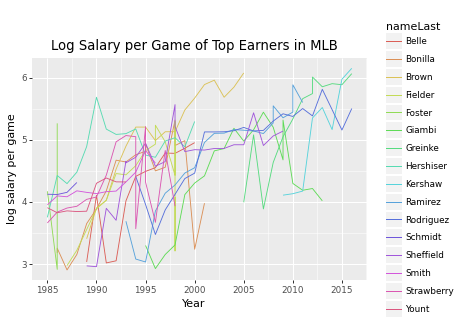

<ggplot: (690442587)>

In [19]:

from plotnine import ggplot, aes, geom_line, scale_x_continuous, xlab, ylab, ggtitle
 
(
     ggplot(data = q2_df, mapping = aes(x = "yearID", y = "logsalarypergame", group = "nameLast", color = "nameLast"))  # What data to use  # What variable to use
     + geom_line()+
     scale_x_continuous(breaks = [1985,1990,1995,2000,2005,2010,2015,2020])+
     ylab("log salary per game")+
     xlab("Year")+
     ggtitle("Log Salary per Game of Top Earners in MLB")
) 

c) i) Write a function `total_home_runs` that takes a string `playerID` as argument and returns the total number of home runs of the corresponding player. ii) Next, query the `batting` table to obtain a `pandas.Series` object `playerIDs` containing unique copies of all `playerID`s in that table. iii) Finally, use a suitable parallelization technique to call `total_home_runs` with each entry of `playerIDs`. Return sorted list of total home runs per player in descending order. Print the first ten entries of that list and the total number of home runs. 

i)


In [35]:
def total_home_runs(playerID: str, connection = engine):
    """ takes a string playerID as argument and returns the total number of home runs of the corresponding player """
    thr_query = 'SELECT SUM(HR) as total_homeruns FROM Batting WHERE playerID = "{}" GROUP BY playerID'.format(playerID)
    homeruns = pd.read_sql(thr_query, con = engine)
    return(homeruns.squeeze()) #return a pandas Series
    
    
#using a parallelization technique, call total_home_runs on all the playerIDs (return some sort of list)



In [36]:
#test the function
total_home_runs(playerID='bondsba01')

762

ii)

In [38]:
batting_query = """
SELECT DISTINCT playerID FROM Batting
"""

unique_batters = pd.read_sql(batting_query, con = engine)
# unique_batters = unique_batters.squeeze()
unique_batters_series = unique_batters.squeeze()
unique_batters_series

0        aardsda01
1        aaronha01
2        aaronto01
3         aasedo01
4         abadan01
           ...    
19684     zupofr01
19685    zuvelpa01
19686    zuverge01
19687    zwilldu01
19688     zychto01
Name: playerID, Length: 19689, dtype: object

In [34]:
unique_batters

,playerID
0,aardsda01
1,aaronha01
2,aaronto01
3,aasedo01
4,abadan01
...,...
19684,zupofr01
19685,zuvelpa01
19686,zuverge01
19687,zwilldu01


iii)

In [53]:
#with parallelization
import multiprocessing

def some_function(playerIDs):
    pool = multiprocessing.Pool()
    return pool.map(total_home_runs, playerIDs) #playerIDs should be an iterable of playerIDs
    


# def task():
#     numbers = [5_000_000 + x for x in range(20)]
#     start_time = time.time()
#     some_function(numbers)
#     print(time.time() - start_time)

# playerID_list = ['aaronha01', 'aaronto01','zwilldu01']

hr = some_function(playerIDs=unique_batters_series)



Process ForkPoolWorker-268:
Process ForkPoolWorker-265:
Process ForkPoolWorker-263:
Process ForkPoolWorker-267:
Process ForkPoolWorker-266:
Process ForkPoolWorker-262:
Process ForkPoolWorker-264:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):


KeyboardInterrupt: 

Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/collinkennedy/miniforge3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/collinkennedy/miniforge3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/collinkennedy/miniforge3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/collinkennedy/miniforge3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/collinkennedy/miniforge3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/collinkennedy/miniforge3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/collinkennedy/miniforge3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/collinkennedy/miniforge3/l

In [51]:
hr.sort(reverse = True)
hr

[755, 30, 13]